In [23]:
import pandas as pd

# Load the training data
train_data = pd.read_csv("training.csv")

In [24]:
# Handling missing values (null values)
train_data.dropna(inplace=True)  # Remove rows with any missing values

In [25]:
# Handling duplicate rows
train_data.drop_duplicates(inplace=True)  # Remove duplicate rows if any


In [26]:
# Save the cleaned data to a new CSV file
train_data.to_csv("cleaned_training.csv", index=False)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [28]:
# Split the data into features and target variable
X = train_data[['Velo', 'SpinRate', 'HorzBreak', 'InducedVertBreak']]
y = train_data['InPlay']

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [31]:
deploy_data = pd.read_csv("deploy.csv")

In [36]:
deploy_data.dropna(inplace=True)

In [37]:
deploy_data.drop_duplicates(inplace=True)

In [38]:
deploy_data.to_csv("cleaned_deploy.csv", index=False)

In [39]:
deploy_X = scaler.transform(deploy_data[['Velo', 'SpinRate', 'HorzBreak', 'InducedVertBreak']])

In [40]:
deploy_predictions = model.predict_proba(deploy_X)[:, 1]

In [41]:
result_df = pd.DataFrame({'PitchInPlayProbability': deploy_predictions})

In [42]:
# Save the predictions to a CSV file
result_df.to_csv("pitch_predictions.csv", index=False)




In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


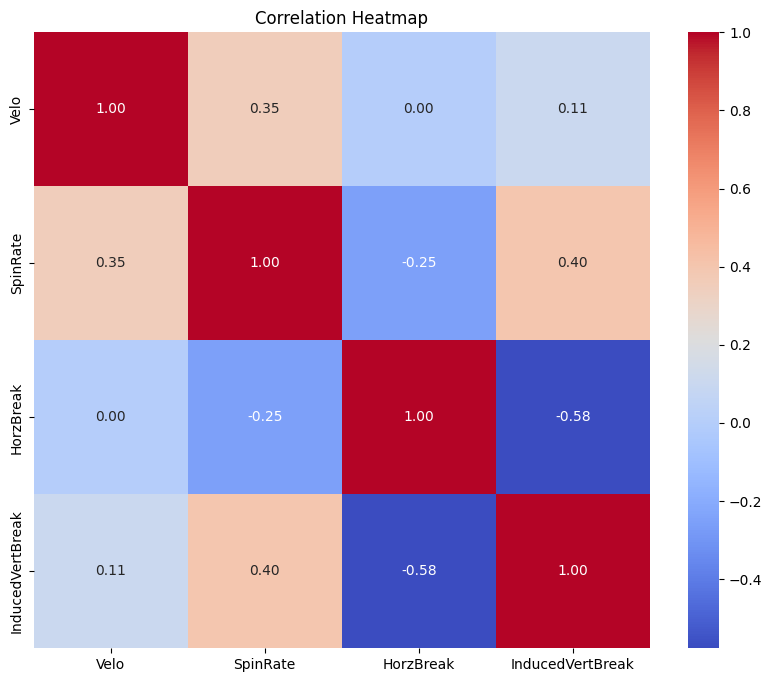

In [46]:
corr_matrix = train_data[['Velo', 'SpinRate', 'HorzBreak', 'InducedVertBreak']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

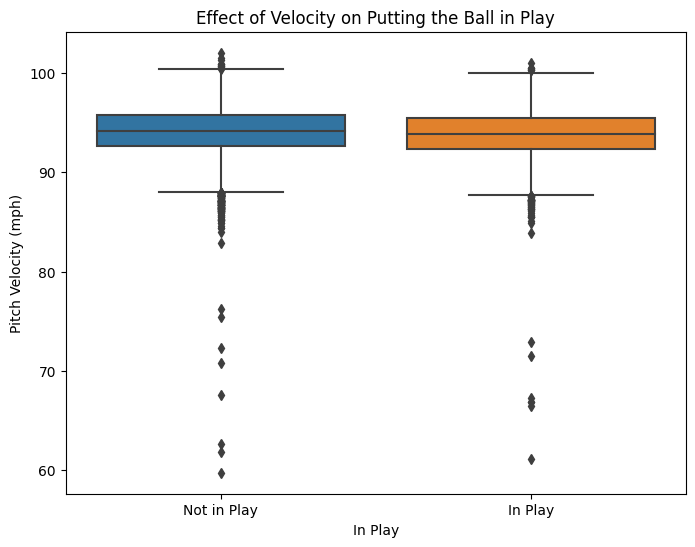

In [49]:
# Create a box plot for pitch velocity
plt.figure(figsize=(8, 6))
sns.boxplot(x='InPlay', y='Velo', data=train_data)
plt.xlabel('In Play')
plt.ylabel('Pitch Velocity (mph)')
plt.title('Effect of Velocity on Putting the Ball in Play')
plt.xticks([0, 1], ['Not in Play', 'In Play'])
plt.show()

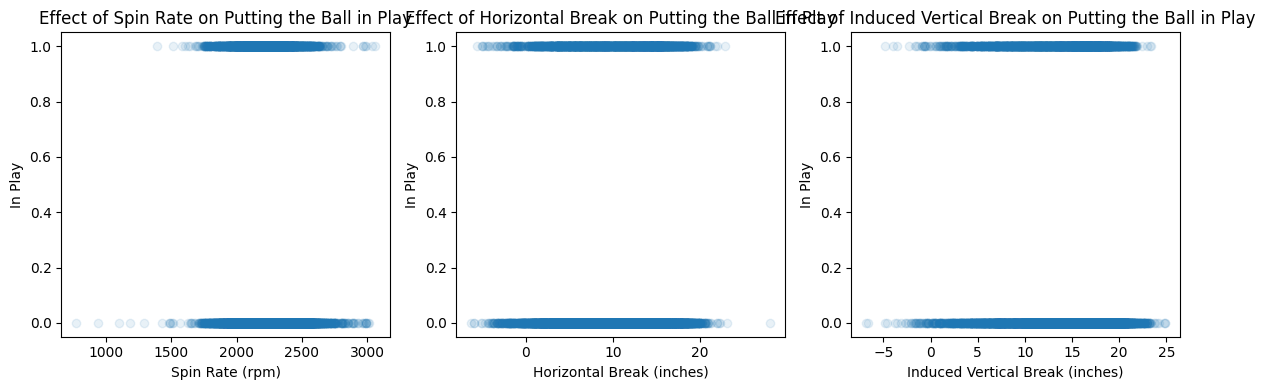

In [50]:
# Create scatter plots for Spin Rate, Horizontal Break, and Induced Vertical Break
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(train_data['SpinRate'], train_data['InPlay'], alpha=0.1)
plt.xlabel('Spin Rate (rpm)')
plt.ylabel('In Play')
plt.title('Effect of Spin Rate on Putting the Ball in Play')

plt.subplot(132)
plt.scatter(train_data['HorzBreak'], train_data['InPlay'], alpha=0.1)
plt.xlabel('Horizontal Break (inches)')
plt.ylabel('In Play')
plt.title('Effect of Horizontal Break on Putting the Ball in Play')

plt.subplot(133)
plt.scatter(train_data['InducedVertBreak'], train_data['InPlay'], alpha=0.1)
plt.xlabel('Induced Vertical Break (inches)')
plt.ylabel('In Play')
plt.title('Effect of Induced Vertical Break on Putting the Ball in Play')

plt.tight_layout()
plt.show()

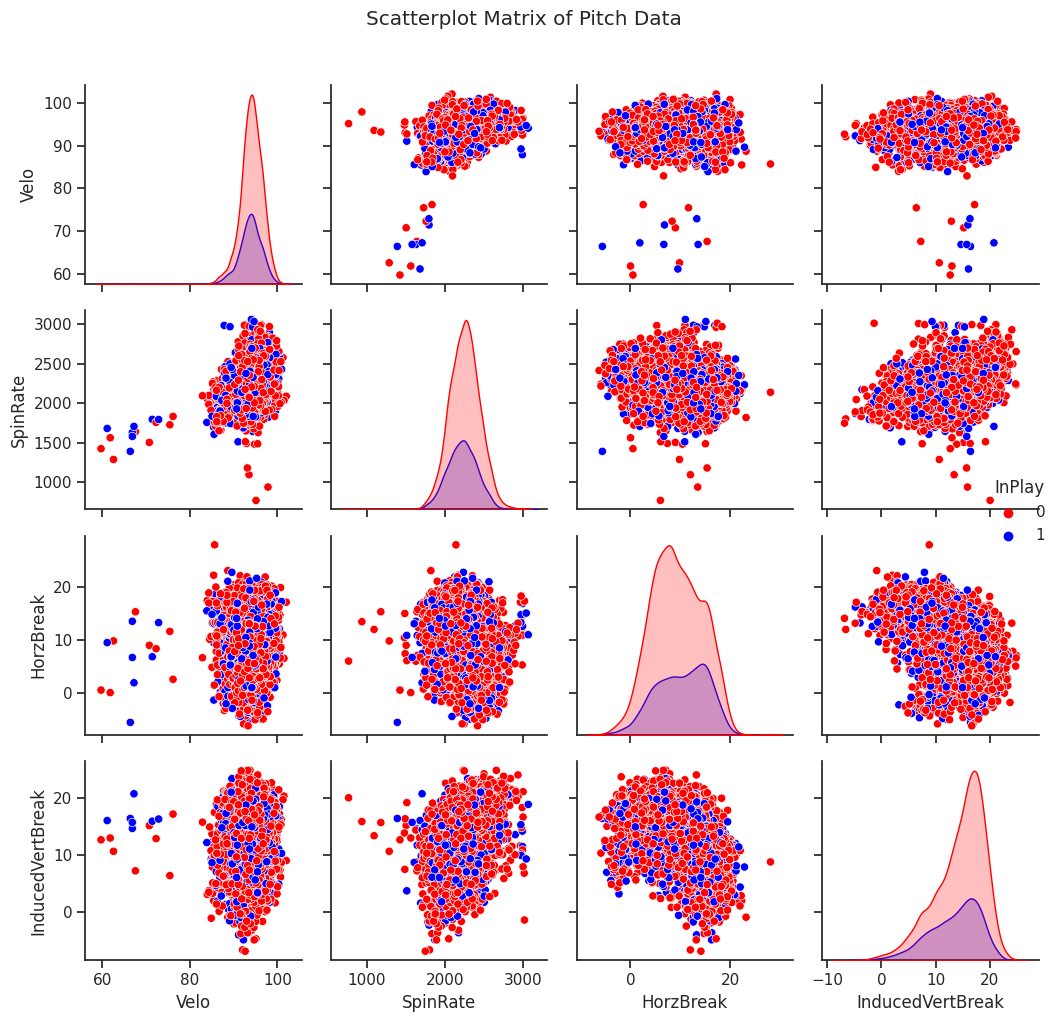

In [52]:
sns.set(style="ticks")

# Create a pairplot with color-coded points based on 'InPlay' column
g = sns.pairplot(train_data, hue="InPlay", palette={0: 'red', 1: 'blue'})

# Customize plot appearance (optional)
g.fig.suptitle("Scatterplot Matrix of Pitch Data", y=1.02)  # Title
plt.tight_layout()

# Show the plot
plt.show()